In [22]:
import fastai
from fastai import *
from fastai.tabular.all import *

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, x, y): return r_mse(m.predict(x), y)

In [58]:
path="C:/Users/1042g/Desktop/ML foundation  CA2/data/machine data.csv"

In [59]:
df_raw=pd.read_csv(path,header=None,low_memory=False)
df_raw.columns=["vendor name","Model Name","MYCT","MMIN","MMAX","CACH","CHMIN",
                                 "CHMAX","PRP","ERP"]

In [60]:
df_original=df_raw.copy()

In [61]:
df_raw

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [62]:
df_raw.drop(["ERP"],axis=1,inplace=True)

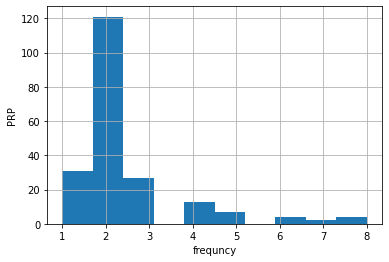

In [89]:
df_raw["PRP_cat"]=pd.cut(df_raw["PRP"],
                     bins=[0., 20.,100., 200., 300.,400.,500.,600., np.inf],labels=[1, 2, 3, 4, 5,6,7,8])
df_raw["PRP_cat"].hist()
plt.ylabel("PRP")
plt.xlabel("frequncy")
plt.savefig("data distribution of PRP")


In [64]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split.split(df_raw, df_raw["PRP_cat"]):
 strat_train_set = df_raw.loc[train_index]
 strat_valid_set = df_raw.loc[valid_index]


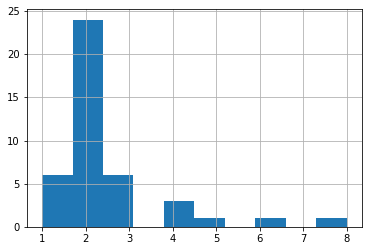

In [90]:
strat_valid_set["PRP_cat"].hist()
plt.savefig("data distribution of PRP validation data")

In [66]:
splits = (list(train_index),list(valid_index))

In [67]:
df_raw.drop(["PRP_cat"],axis=1,inplace=True)

In [68]:
dep_var="PRP"
procs = [Categorify, FillMissing]
cont,cat = cont_cat_split(df_raw, 1, dep_var=dep_var)
df = TabularPandas(df_raw, procs, cat, cont, y_names=dep_var, splits=splits)

In [69]:
df.train.xs

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
189,27,89,59,8000,16000,64,12,24
118,18,53,25,2000,12000,8,1,4
51,11,165,700,256,2000,0,1,1
64,14,139,75,2000,16000,64,1,38
198,28,7,30,8000,64000,96,12,176
...,...,...,...,...,...,...,...,...
115,18,50,185,2000,16000,16,1,6
199,28,8,30,8000,64000,128,12,176
138,22,111,115,2000,8000,16,1,3
21,6,135,143,3100,6200,0,5,20


In [70]:
X_train,y_train = df.train.xs,df.train.y
X_valid,y_valid = df.valid.xs,df.valid.y

In [71]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS.fit(X_train)
X_train_std=pd.DataFrame(SS.transform(X_train),columns=X_train.columns)
X_valid_std=pd.DataFrame(SS.transform(X_valid),columns=X_valid.columns)

In [72]:
X_train_std

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,1.351715,-0.303610,-0.568594,1.525443,0.376566,0.874938,1.065699,0.198289
1,0.135172,-0.887333,-0.708768,-0.232275,0.030966,-0.426958,-0.529810,-0.523941
2,-0.811029,0.928695,2.074090,-0.743185,-0.833032,-0.612944,-0.529810,-0.632275
3,-0.405515,0.507117,-0.502630,-0.232275,0.376566,0.874938,-0.529810,0.703849
4,1.486887,-1.633202,-0.688154,1.525443,4.523757,1.618878,1.065699,5.687232
...,...,...,...,...,...,...,...,...
162,0.135172,-0.935977,-0.049127,-0.232275,0.376566,-0.240973,-0.529810,-0.451718
163,1.486887,-1.616988,-0.688154,1.525443,4.523757,2.362819,1.065699,5.687232
164,0.675858,0.053110,-0.337720,-0.232275,-0.314633,-0.240973,-0.529810,-0.560052
165,-1.486887,0.442259,-0.222283,0.089973,-0.470153,-0.612944,0.050375,0.053843


In [73]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train_std,y_train)
print("RMSE on training data: ",m_rmse(LR,X_train_std,y_train))
print("RMSE on validation data: ",m_rmse(LR,X_valid_std,y_valid))

from sklearn.metrics import r2_score
print("R2 score of training data",r2_score(y_train,LR.predict(X_train_std)))
print("R2 score of validation data",r2_score(y_valid,LR.predict(X_valid_std)))

RMSE on training data:  59.592999
RMSE on validation data:  64.296008
R2 score of training data 0.8474442173588106
R2 score of validation data 0.8834651638700353


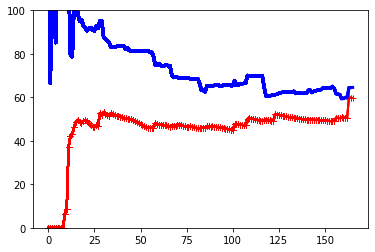

In [91]:
plot_learning_curves(LR,X_train,y_train,X_valid,y_valid)
plt.savefig("LR traing and validation error")


In [80]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)


In [81]:
X_poly_train = pd.DataFrame(poly_features.fit_transform(X_train))
X_poly_valid=pd.DataFrame(poly_features.fit_transform(X_valid))

In [82]:
X_poly_train

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,27.0,89.0,59.0,8000.0,16000.0,64.0,12.0,24.0,729.0,2403.0,...,2.560000e+08,1024000.0,192000.0,384000.0,4096.0,768.0,1536.0,144.0,288.0,576.0
1,18.0,53.0,25.0,2000.0,12000.0,8.0,1.0,4.0,324.0,954.0,...,1.440000e+08,96000.0,12000.0,48000.0,64.0,8.0,32.0,1.0,4.0,16.0
2,11.0,165.0,700.0,256.0,2000.0,0.0,1.0,1.0,121.0,1815.0,...,4.000000e+06,0.0,2000.0,2000.0,0.0,0.0,0.0,1.0,1.0,1.0
3,14.0,139.0,75.0,2000.0,16000.0,64.0,1.0,38.0,196.0,1946.0,...,2.560000e+08,1024000.0,16000.0,608000.0,4096.0,64.0,2432.0,1.0,38.0,1444.0
4,28.0,7.0,30.0,8000.0,64000.0,96.0,12.0,176.0,784.0,196.0,...,4.096000e+09,6144000.0,768000.0,11264000.0,9216.0,1152.0,16896.0,144.0,2112.0,30976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,18.0,50.0,185.0,2000.0,16000.0,16.0,1.0,6.0,324.0,900.0,...,2.560000e+08,256000.0,16000.0,96000.0,256.0,16.0,96.0,1.0,6.0,36.0
163,28.0,8.0,30.0,8000.0,64000.0,128.0,12.0,176.0,784.0,224.0,...,4.096000e+09,8192000.0,768000.0,11264000.0,16384.0,1536.0,22528.0,144.0,2112.0,30976.0
164,22.0,111.0,115.0,2000.0,8000.0,16.0,1.0,3.0,484.0,2442.0,...,6.400000e+07,128000.0,8000.0,24000.0,256.0,16.0,48.0,1.0,3.0,9.0
165,6.0,135.0,143.0,3100.0,6200.0,0.0,5.0,20.0,36.0,810.0,...,3.844000e+07,0.0,31000.0,124000.0,0.0,0.0,0.0,25.0,100.0,400.0


In [83]:
SS=StandardScaler()
SS.fit(X_poly_train)
X_poly_train_std=pd.DataFrame(SS.transform(X_poly_train))
X_poly_valid_std=pd.DataFrame(SS.transform(X_poly_valid))

In [84]:
LR_poly=LinearRegression()
LR_poly.fit(X_poly_train_std,y_train)
print("RMSE on training data: ",m_rmse(LR_poly,X_poly_train_std,y_train))
print("RMSE on validation data: ",m_rmse(LR_poly,X_poly_valid_std,y_valid))

from sklearn.metrics import r2_score
print("R2 score of training data",r2_score(y_train,LR_poly.predict(X_poly_train_std)))
print("R2 score of validation data",r2_score(y_valid,LR_poly.predict(X_poly_valid_std)))


RMSE on training data:  21.357588
RMSE on validation data:  60.999958
R2 score of training data 0.9804051198002194
R2 score of validation data 0.8951069231748879


In [85]:
from sklearn.metrics import mean_squared_error

In [86]:
def plot_learning_curves(model, X_train, y_train,X_valid,y_valid):
 train_errors, val_errors = [], []
 for m in range(1, len(X_train)):
     model.fit(X_train[:m], y_train[:m])
     y_train_predict = model.predict(X_train[:m])
     y_val_predict = model.predict(X_valid)
     train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
     val_errors.append(mean_squared_error(y_valid, y_val_predict))
     plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
     plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
     plt.ylim(0,100)


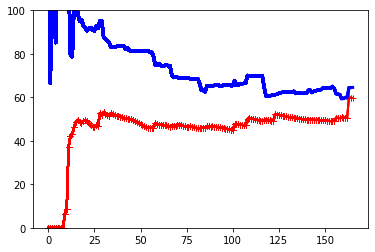

In [92]:
plot_learning_curves(LR_poly,X_train,y_train,X_valid,y_valid)
plt.savefig("PLR traing and validation error")

In [47]:
corr_matrix = X_train.corr()

<AxesSubplot:>

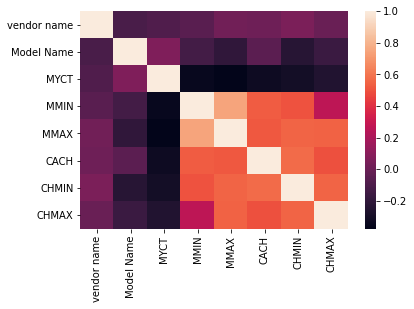

In [48]:
sns.heatmap(corr_matrix)

In [49]:
corr_matrix

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
vendor name,1.000000,-0.110366,-0.088209,-0.056686,0.027265,0.013022,0.058799,0.000637
Model Name,-0.110366,1.000000,0.070300,-0.129939,-0.199887,-0.047911,-0.231665,-0.161569
MYCT,-0.088209,0.070300,1.000000,-0.345468,-0.373767,-0.321879,-0.300483,-0.253041
MMIN,-0.056686,-0.129939,-0.345468,1.000000,0.750557,0.529260,0.501154,0.265147
MMAX,0.027265,-0.199887,-0.373767,0.750557,1.000000,0.522083,0.550775,0.544452
CACH,0.013022,-0.047911,-0.321879,0.529260,0.522083,1.000000,0.575333,0.496217
CHMIN,0.058799,-0.231665,-0.300483,0.501154,0.550775,0.575333,1.000000,0.552911
CHMAX,0.000637,-0.161569,-0.253041,0.265147,0.544452,0.496217,0.552911,1.000000


array([[<AxesSubplot:xlabel='MYCT', ylabel='MYCT'>,
        <AxesSubplot:xlabel='MMIN', ylabel='MYCT'>,
        <AxesSubplot:xlabel='MMAX', ylabel='MYCT'>,
        <AxesSubplot:xlabel='CACH', ylabel='MYCT'>,
        <AxesSubplot:xlabel='CHMIN', ylabel='MYCT'>,
        <AxesSubplot:xlabel='CHMAX', ylabel='MYCT'>,
        <AxesSubplot:xlabel='PRP', ylabel='MYCT'>],
       [<AxesSubplot:xlabel='MYCT', ylabel='MMIN'>,
        <AxesSubplot:xlabel='MMIN', ylabel='MMIN'>,
        <AxesSubplot:xlabel='MMAX', ylabel='MMIN'>,
        <AxesSubplot:xlabel='CACH', ylabel='MMIN'>,
        <AxesSubplot:xlabel='CHMIN', ylabel='MMIN'>,
        <AxesSubplot:xlabel='CHMAX', ylabel='MMIN'>,
        <AxesSubplot:xlabel='PRP', ylabel='MMIN'>],
       [<AxesSubplot:xlabel='MYCT', ylabel='MMAX'>,
        <AxesSubplot:xlabel='MMIN', ylabel='MMAX'>,
        <AxesSubplot:xlabel='MMAX', ylabel='MMAX'>,
        <AxesSubplot:xlabel='CACH', ylabel='MMAX'>,
        <AxesSubplot:xlabel='CHMIN', ylabel='MMAX'>,
       

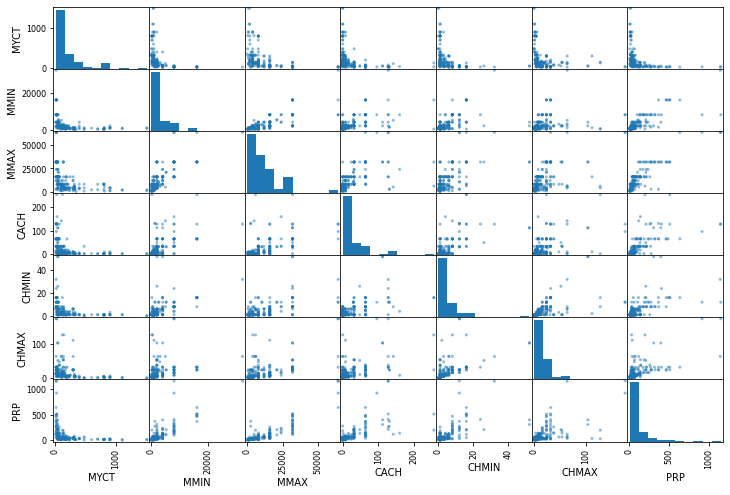

In [49]:
from pandas.plotting import scatter_matrix
attributes = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP']
scatter_matrix(df_original[attributes], figsize=(12, 8))
